In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Problem 1

In [3]:
def l2_distance(x, y):
    return (x - y) ** 2

def l1_distance(x, y):
    return abs(x - y)


def pixel_wise_matching_l2(img_left : np.ndarray, img_right : np.ndarray, disparity_range = 16 , scale = 16):
    img_left = img_left.astype(np.float32)
    img_right = img_right.astype(np.float32)

    height, width = img_left.shape

    depth = np.zeros((height, width))

    for h in range(height):
        for w in range(width):
            pixel_left = img_left[h,w]
            max_cost = 255**2
            d_optimal = 0
            min_cost = max_cost
            for d in range(disparity_range + 1):
                cost = 0
                if w - d >= 0:
                    pixel_right = img_right[h, w - d]
                    cost = l2_distance(pixel_left, pixel_right)
                else:
                    cost = max_cost
                
                
                if min_cost > cost:
                    min_cost = cost
                    d_optimal = d
            
            depth[h,w] = d_optimal * scale

    
    depth = np.clip(depth, 0, 255).astype(np.uint8)
    return depth

def pixel_wise_matching_l1(img_left: np.ndarray, img_right: np.ndarray, disparity_range=16, scale=16):
    img_left = img_left.astype(np.float32)
    img_right = img_right.astype(np.float32)

    height, width = img_left.shape

    depth = np.zeros((height, width))

    for h in range(height):
        for w in range(width):
            pixel_left = img_left[h, w]
            max_cost = 255
            d_optimal = 0
            min_cost = max_cost
            for d in range(disparity_range + 1):
                cost = 0
                if w - d >= 0:
                    pixel_right = img_right[h, w - d]
                    cost = l1_distance(pixel_left, pixel_right)
                else:
                    cost = max_cost

                if min_cost > cost:
                    min_cost = cost
                    d_optimal = d

            depth[h, w] = d_optimal * scale

    depth = np.clip(depth, 0, 255).astype(np.uint8)
    return depth

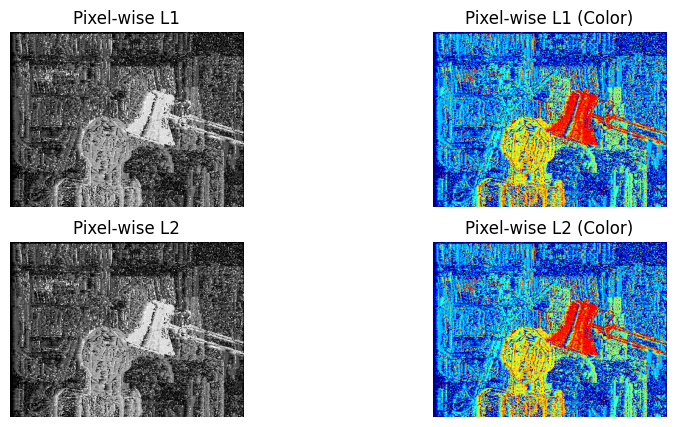

In [4]:
img_left = cv2.imread('./tsukuba/left.png', 0)
img_right = cv2.imread('./tsukuba/right.png', 0)

depth_l2 = pixel_wise_matching_l2(img_left, img_right)
depth_l1 = pixel_wise_matching_l1(img_left, img_right)

plt.figure(figsize=(10, 5))

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 1)
plt.imshow(depth_l2, cmap='gray')
plt.title('Pixel-wise L1')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth_l2, cv2.COLORMAP_JET)
# Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 2)
plt.imshow(depth_colored_rgb)
plt.title('Pixel-wise L1 (Color)')
plt.axis('off')

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 3)
plt.imshow(depth_l2, cmap='gray')
plt.title('Pixel-wise L2')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth_l2, cv2.COLORMAP_JET)
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
plt.subplot(2, 2, 4)
plt.imshow(depth_colored_rgb)
plt.title('Pixel-wise L2 (Color)')
plt.axis('off')

# Hiển thị các hình ảnh
plt.show()

## Problem 2:

In [6]:
def l2_distance(x, y):
    return (x - y) ** 2

def l1_distance(x, y):
    return abs(x - y)

def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5):
    img_left = left_img.astype(np.float32)
    img_right = right_img.astype(np.float32)

    height, width = img_left.shape

    depth = np.zeros((height, width))
    kernel_half = (kernel_size - 1) // 2
    max_cost = 255 ** 2
    
    scale = 3
    for h in range(kernel_half, height - kernel_half + 1):
        for w in range(kernel_half, width - kernel_half + 1):
            min_cost_each_kernel = 255**kernel_size
            d_optimal = 0
            for d in range(disparity_range + 1):
                
                total_cost_each_pixel = 0
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        cost = 0
                        if w + u - d >= 0:
                            pixel_left = img_left[h + v, w + u]
                            pixel_right = img_right[h + v, w + u - d]
                            cost = l2_distance(pixel_left, pixel_right)
                        else:
                            cost = max_cost 
                        
                        total_cost_each_pixel += cost
                
                if total_cost_each_pixel < min_cost_each_kernel:
                    min_cost_each_kernel = total_cost_each_pixel
                    d_optimal = d

            depth[h, w] = d_optimal * scale
            
    depth = np.clip(depth, 0, 255).astype(np.uint8)
    return depth

def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=5):
    img_left = left_img.astype(np.float32)
    img_right = right_img.astype(np.float32)

    height, width = img_left.shape

    depth = np.zeros((height, width))
    kernel_half = (kernel_size - 1) // 2
    max_cost = 255 

    scale = 3
    for h in range(kernel_half, height - kernel_half + 1):
        for w in range(kernel_half, width - kernel_half + 1):
            min_cost_each_kernel = 255**kernel_size
            d_optimal = 0
            for d in range(disparity_range + 1):

                total_cost_each_pixel = 0
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        cost = 0
                        if w + u - d >= 0:
                            pixel_left = img_left[h + v, w + u]
                            pixel_right = img_right[h + v, w + u - d]
                            cost = l1_distance(pixel_left, pixel_right)
                        else:
                            cost = max_cost

                        total_cost_each_pixel += cost

                if total_cost_each_pixel < min_cost_each_kernel:
                    min_cost_each_kernel = total_cost_each_pixel
                    d_optimal = d

            depth[h, w] = d_optimal * scale

    depth = np.clip(depth, 0, 255).astype(np.uint8)
    return depth

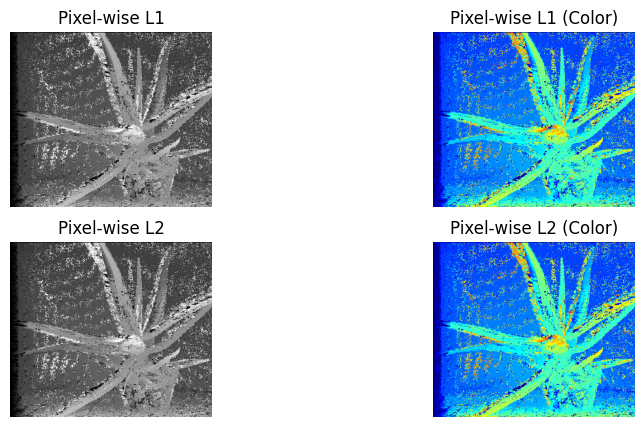

In [7]:
img_left = cv2.imread('./Aloe/Aloe_left_1.png', 0)
img_right = cv2.imread('./Aloe/Aloe_right_1.png', 0)
disparity_range = 64
kernel_size = 3

depth_l2 = window_based_matching_l2(img_left, img_right, disparity_range, kernel_size)
depth_l1 = window_based_matching_l1(img_left, img_right, disparity_range, kernel_size) 

plt.figure(figsize=(10, 5))

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 1)
plt.imshow(depth_l2, cmap='gray')
plt.title('Pixel-wise L1')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth_l2, cv2.COLORMAP_JET)
# Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 2)
plt.imshow(depth_colored_rgb)
plt.title('Pixel-wise L1 (Color)')
plt.axis('off')

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 3)
plt.imshow(depth_l2, cmap='gray')
plt.title('Pixel-wise L2')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth_l2, cv2.COLORMAP_JET)
# Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 4)
plt.imshow(depth_colored_rgb)
plt.title('Pixel-wise L2 (Color)')
plt.axis('off')

# Hiển thị các hình ảnh
plt.show()

## Problem 3

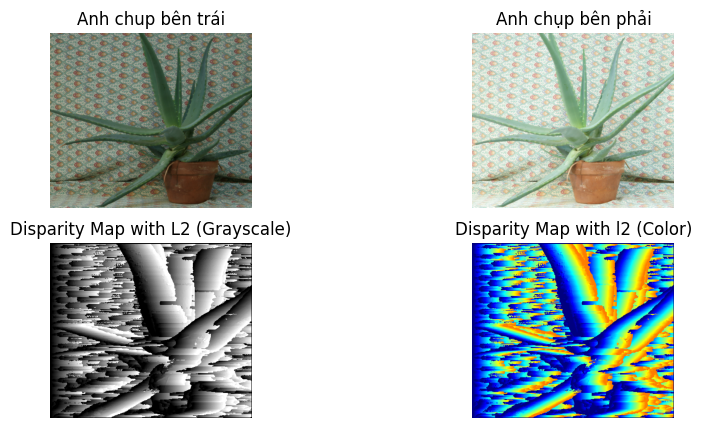

In [8]:
img_left = cv2.imread('./Aloe/Aloe_left_1.png', 0)
img_right = cv2.imread('./Aloe/Aloe_right_2.png', 0)

disparity_range = 64
kernel_size = 5

depth = window_based_matching_l2(
    img_left, img_right, disparity_range, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)


img_left = cv2.imread('./Aloe/Aloe_left_1.png', 1)
img_right = cv2.imread('./Aloe/Aloe_right_2.png', 1)
img_left_rgb = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_left_rgb)
plt.title('Anh chup bên trái')
plt.axis('off')

plt.subplot(2, 2, 2)

img_right_rgb = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_right_rgb)
plt.title('Anh chụp bên phải')
plt.axis('off')

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 3)
plt.imshow(depth, cmap='gray')
plt.title('Disparity Map with L2 (Grayscale)')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
# Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 4)
plt.imshow(depth_colored_rgb)
plt.title('Disparity Map with l2 (Color)')
plt.axis('off')


# Hiển thị các hình ảnh
plt.show()

## Problem 4

In [17]:
def compute_cosine_similarity(x : np.ndarray,y :np.ndarray):
    numerator = x.dot(y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)

    return numerator / denominator

def window_based_matching(left_img : np.ndarray, right_img : np.ndarray, disparity_range, kernel_size=5):
    img_left = left_img.astype(np.float32)
    img_right = right_img.astype(np.float32)

    height, width = img_left.shape

    depth = np.zeros((height, width))
    kernel_half = (kernel_size - 1) // 2

    scale = 3
    for h in range(kernel_half, height - kernel_half):
        for w in range(kernel_half, width - kernel_half):
            cost_optimal = -1
            d_optimal = 0
            for d in range(disparity_range + 1):
                total_cost_each_pixel = 0
                if (w - d - kernel_half > 0):
                    pixel_left = img_left[(h - kernel_half):(h + kernel_half) + 1, (w - kernel_half) : (w + kernel_half) + 1]
                    pixel_right = img_right[(
                        h - kernel_half):(h + kernel_half) + 1, (w - d - kernel_half) : (w - d + kernel_half) + 1]
                    
                    pixel_left_flatten = pixel_left.flatten()
                    pixel_right_flatten = pixel_right.flatten()

                    total_cost_each_pixel = compute_cosine_similarity(pixel_left_flatten, pixel_right_flatten)
                else:
                    total_cost_each_pixel = cost_optimal

                if total_cost_each_pixel > cost_optimal:
                    cost_optimal = total_cost_each_pixel
                    d_optimal = d

            depth[h, w] = d_optimal * scale

    depth = np.clip(depth, 0, 255).astype(np.uint8)
    return depth

2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
2 101
2 102
2 103
2 104
2 105
2 106
2 107
2 108
2 109
2 110
2 111
2 112
2 113
2 114
2 115
2 116
2 117
2 118
2 119
2 120
2 121
2 122
2 123
2 124
2 125
2 126
2 127
2 128
2 129
2 130
2 131
2 132
2 133
2 134
2 135
2 136
2 137
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 145
2 146
2 147
2 148
2 149
2 150
2 151
2 152
2 153
2 154
2 155
2 156
2 157
2 158
2 159
2 160
2 161
2 162
2 163
2 164
2 165
2 166
2 167
2 168
2 169
2 170
2 171
2 172
2 173
2 174
2 175
2 176
2 177
2 178
2 179
2 180
2 181
2 182
2 183
2 184
2 185
2 

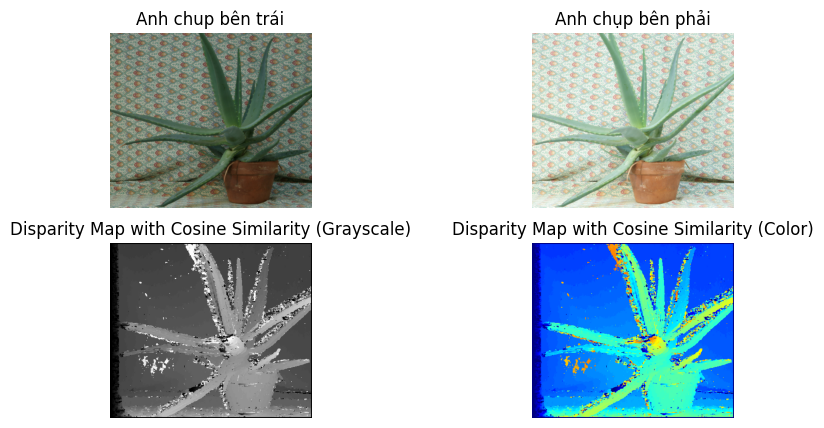

In [18]:
img_left = cv2.imread('./Aloe/Aloe_left_1.png', 0)
img_right = cv2.imread('./Aloe/Aloe_right_2.png', 0)

disparity_range = 64
kernel_size = 5

depth = window_based_matching(
    img_left, img_right, disparity_range, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)


img_left = cv2.imread('./Aloe/Aloe_left_1.png', 1)
img_right = cv2.imread('./Aloe/Aloe_right_2.png', 1)
img_left_rgb = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_left_rgb)
plt.title('Anh chup bên trái')
plt.axis('off')

plt.subplot(2, 2, 2)

img_right_rgb = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_right_rgb)
plt.title('Anh chụp bên phải')
plt.axis('off')

# Hiển thị ảnh gốc (grayscale)
plt.subplot(2, 2, 3)
plt.imshow(depth, cmap='gray')
plt.title('Disparity Map with Cosine Similarity (Grayscale)')
plt.axis('off')

# Hiển thị ảnh với ColorMap
depth_colored = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
# Chuyển đổi từ BGR sang RGB để hiển thị đúng màu sắc
depth_colored_rgb = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)
plt.subplot(2, 2, 4)
plt.imshow(depth_colored_rgb)
plt.title('Disparity Map with Cosine Similarity (Color)')
plt.axis('off')


# Hiển thị các hình ảnh
plt.show()